## Algorithms for phase retrieval
Implementation for 
* Oversampling smoothness (OSS)

*References:* <br>
- *Fienup [1982](http://ao.osa.org/abstract.cfm?URI=ao-21-15-2758)*<br>
- *Rodriguez+[2013](https://doi.org/10.1107/S0021889813002471)*

** (continued from the other [notebook](https://nbviewer.jupyter.org/github/Mipanox/GPI_stuff/blob/master/notebooks/PR_PD-ER.ipynb))**

In [31]:
%%capture
%load_ext autoreload
%autoreload 2+

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
exec(open('../codes/zernike.py'))
exec(open('../codes/pr.py'))
exec(open('../codes/util.py'))
%matplotlib inline

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

---
## Input (true images)
As usual, maximum 20% aberrations in ONLY phase. The SAME phase aberration used in other notebooks (i.e. to be compared with ER, HIO, and PD)

In [32]:
coeff2 = [0,1,0,0,0,1,2,0,2,1.5,2,0,0,0,0]
coeff1 = [0]*15 #np.random.random(15)
P,P_,F,F_ = true_imgs(Npix=128,coeff1=coeff1,coeff2=coeff2,oversamp=2)

#### Oversampling
Zero-pad the pupil plane (object domain) image to for oversampling of 2 (Miao+[1998](http://dx.doi.org/10.1364/JOSAA.15.001662))

In [33]:
test = PR(pup=P,foc=F,oversamp=2)

### Run
#### 1. $\beta=0.5$

Caution: Pupil image is not used for constraints.
         This is one-image process.


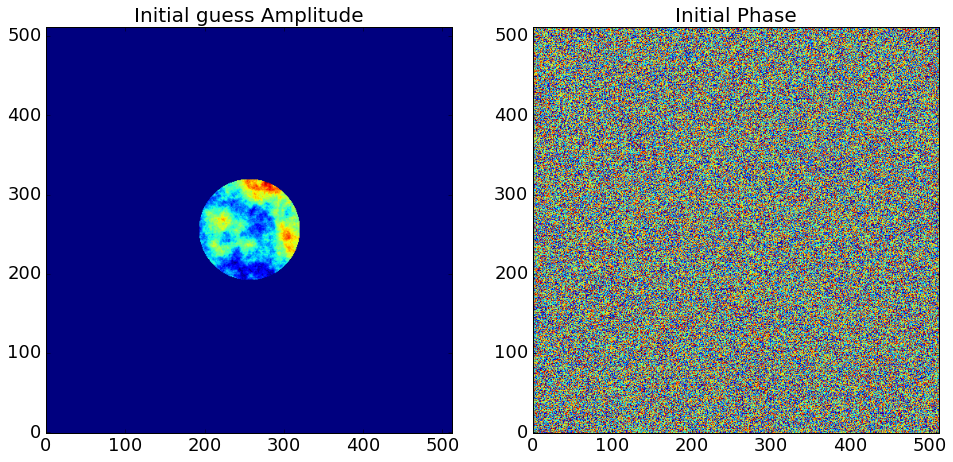

Current filter:


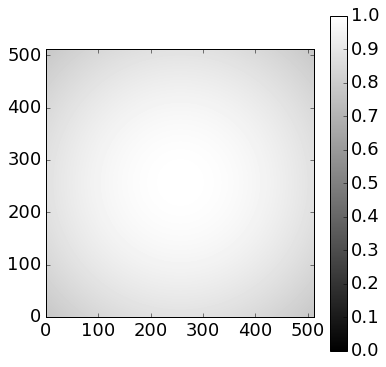

Current iter. : 100
        Error : 1.70e-03
Current iter. : 200
        Error : 1.66e-03
Current filter:


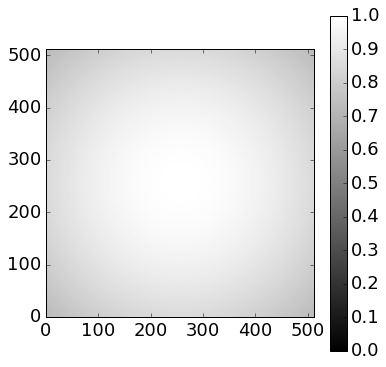

Current iter. : 300
        Error : 1.72e-03
Current iter. : 400
        Error : 1.78e-03
Current filter:


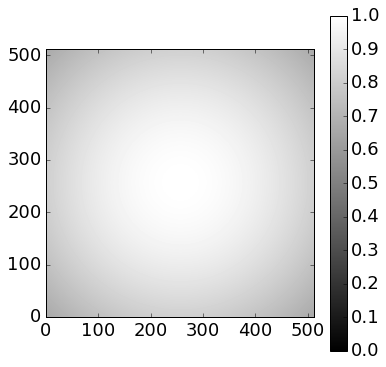

Current iter. : 500
        Error : 1.83e-03
Current iter. : 600
        Error : 1.90e-03
Current filter:


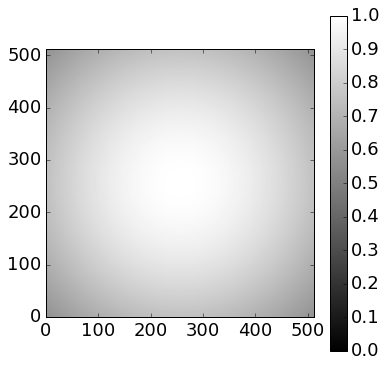

Current iter. : 700
        Error : 1.87e-03
Current iter. : 800
        Error : 1.95e-03
Current filter:


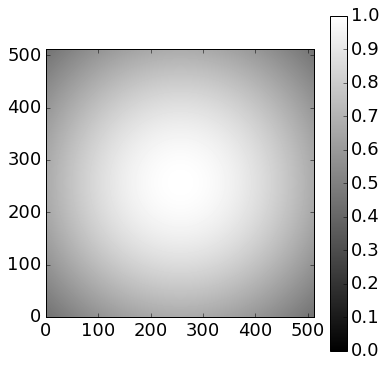

Current iter. : 900
        Error : 1.87e-03
Current iter. : 1000
        Error : 1.96e-03
Current filter:


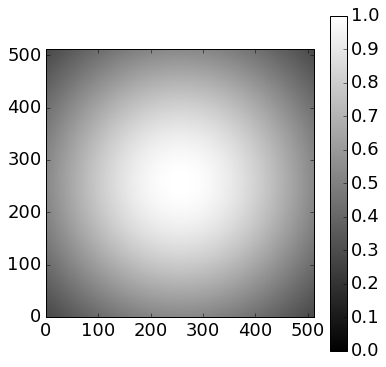

Current iter. : 1100
        Error : 1.84e-03
Current iter. : 1200
        Error : 1.93e-03
Current filter:


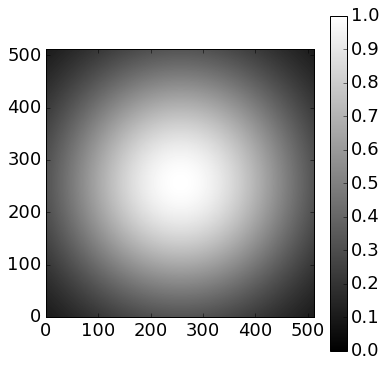

Current iter. : 1300
        Error : 1.96e-03
Current iter. : 1400
        Error : 2.05e-03
Current filter:


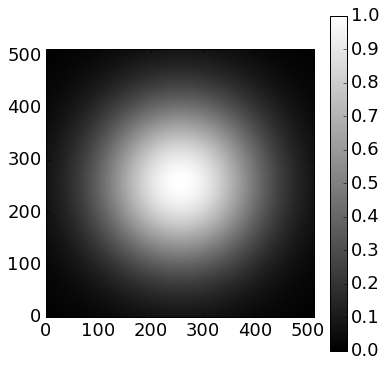

Current iter. : 1500
        Error : 1.93e-03
Current iter. : 1600
        Error : 2.07e-03
Current filter:


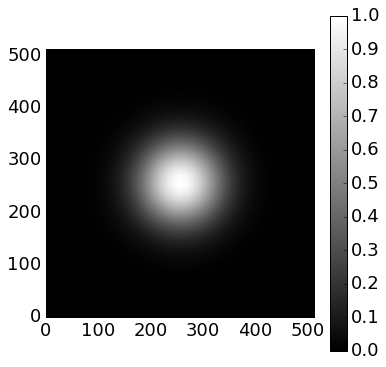

Current iter. : 1700
        Error : 2.28e-03
Current iter. : 1800
        Error : 2.52e-03
Current filter:


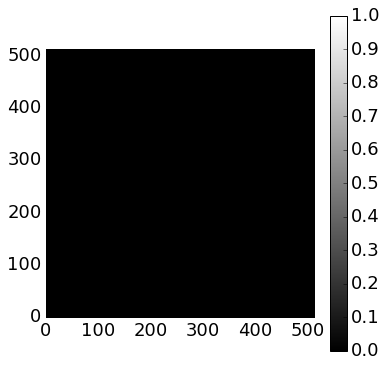

Current iter. : 1900
        Error : 2.23e-05
Current iter. : 2000
        Error : 1.88e-05
-----------------------
First iteration error: 1.10e-02
Final iteration : 2000
Final Error: 1.88e-05


In [34]:
OSS_pup,OSS_foc,OSS_errlist,OSS_pup_proj = test.OSS(beta=0.5,init='random')

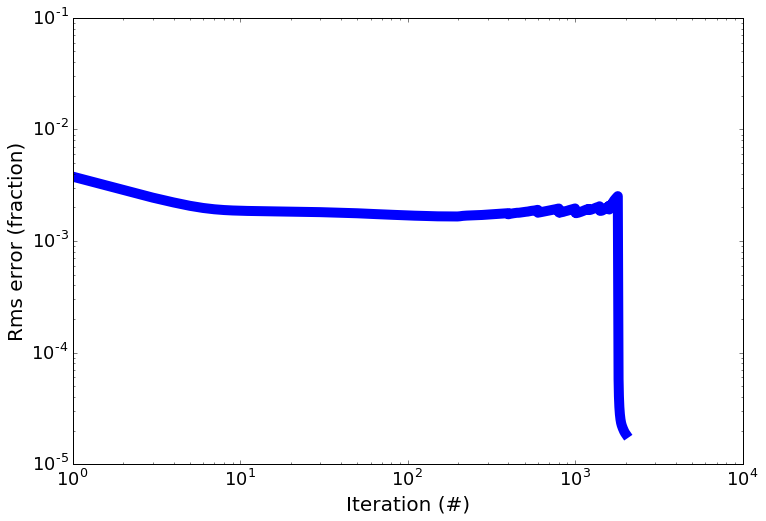

In [35]:
plot_errlist(OSS_errlist)

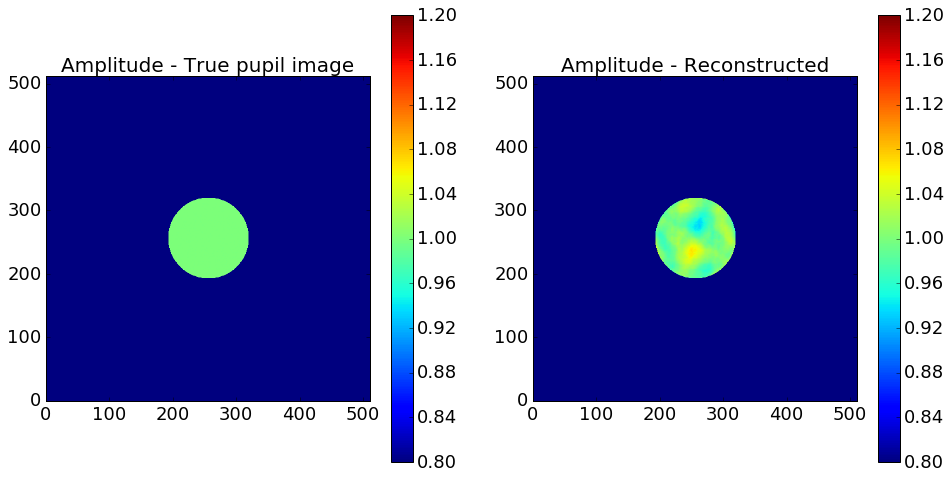

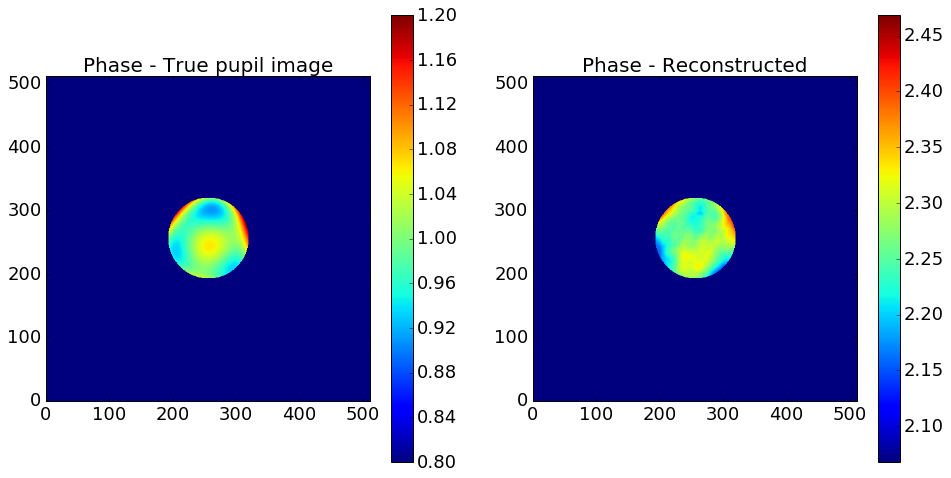

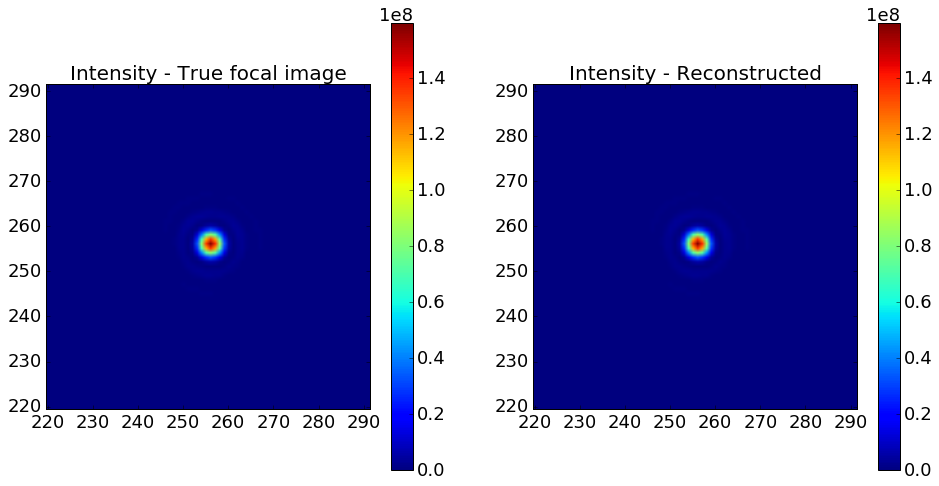

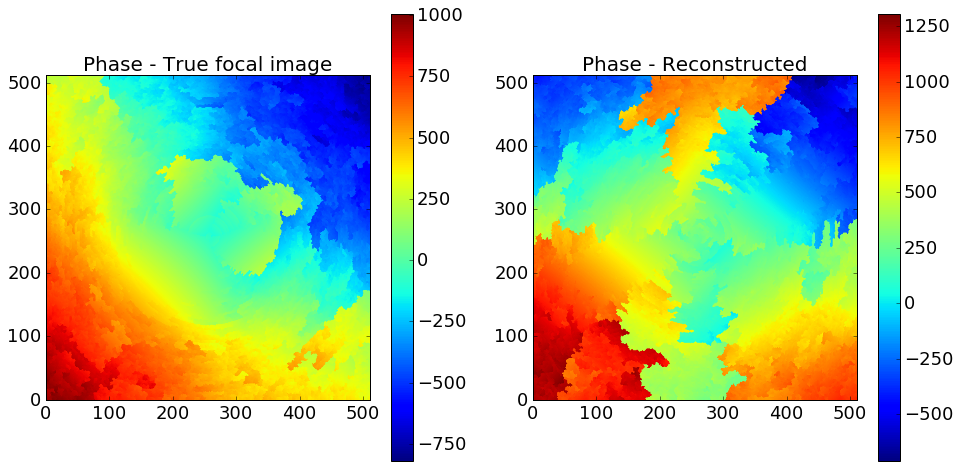

In [36]:
plot_recon(P_,F_,OSS_pup,OSS_foc,recons_clim=True)

Intriguing. While pure HIO does not suffer from the mixing problem, now it comes back. Afterall, OSS was designed to handle noises which we have not added at all.

The introduction of filtering suppresses essentially everything outside the support

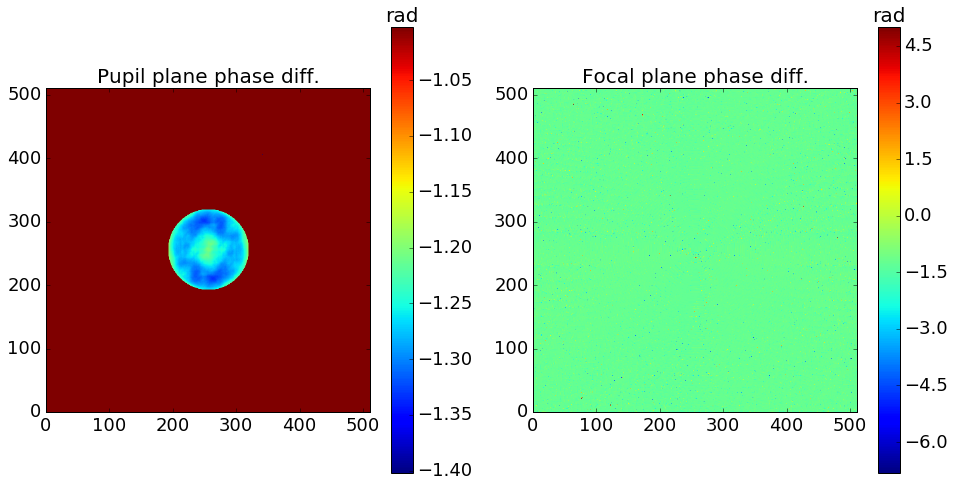

In [37]:
plot_phase_residual(P_,F_,OSS_pup,OSS_foc)

Clearly, thanks to mixing, the phase reconstruction isn't so good.

#### 2. $\beta=0.7$

Caution: Pupil image is not used for constraints.
         This is one-image process.


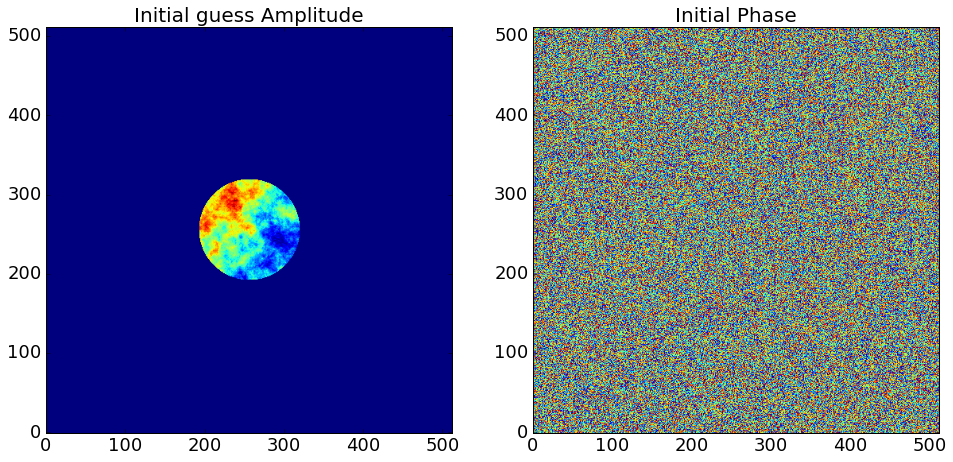

Current filter:


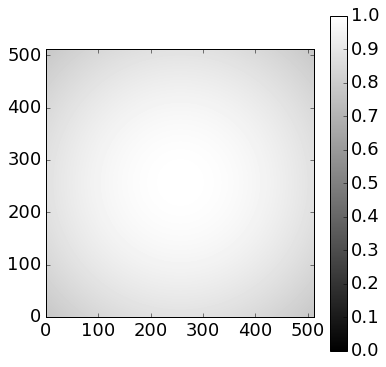

Current iter. : 100
        Error : 2.14e-03
Current iter. : 200
        Error : 2.09e-03
Current filter:


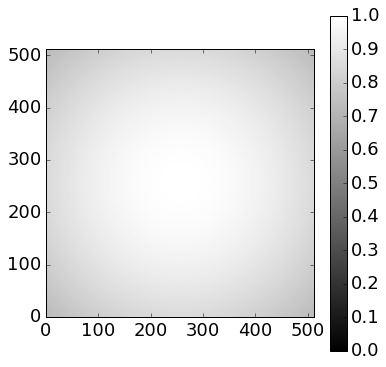

Current iter. : 300
        Error : 2.12e-03
Current iter. : 400
        Error : 2.17e-03
Current filter:


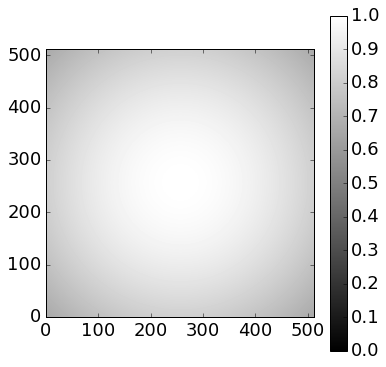

Current iter. : 500
        Error : 2.24e-03
Current iter. : 600
        Error : 2.31e-03
Current filter:


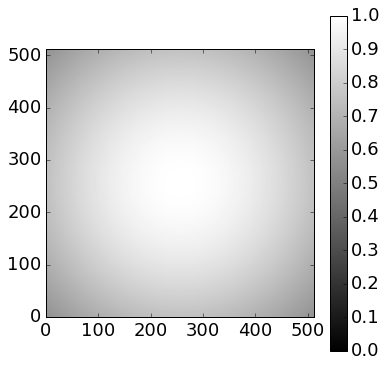

Current iter. : 700
        Error : 2.33e-03
Current iter. : 800
        Error : 2.40e-03
Current filter:


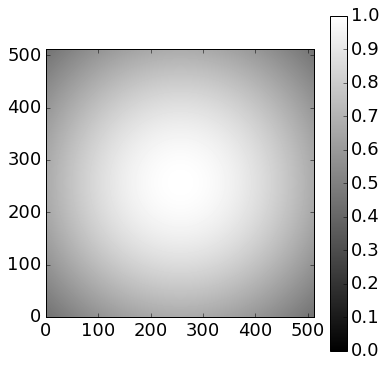

Current iter. : 900
        Error : 2.34e-03
Current iter. : 1000
        Error : 2.41e-03
Current filter:


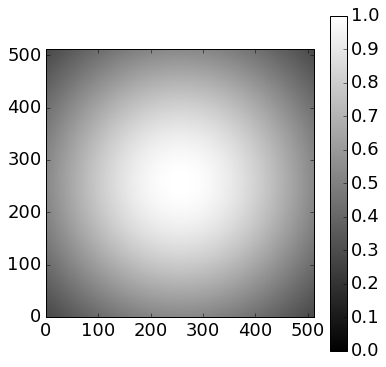

Current iter. : 1100
        Error : 2.30e-03
Current iter. : 1200
        Error : 2.38e-03
Current filter:


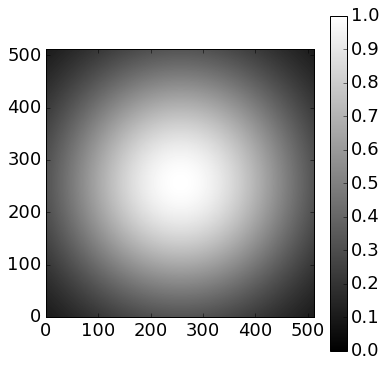

Current iter. : 1300
        Error : 2.35e-03
Current iter. : 1400
        Error : 2.40e-03
Current filter:


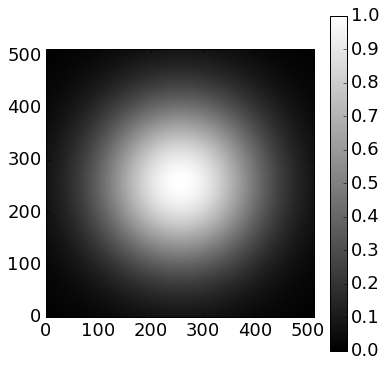

Current iter. : 1500
        Error : 2.34e-03
Current iter. : 1600
        Error : 2.37e-03
Current filter:


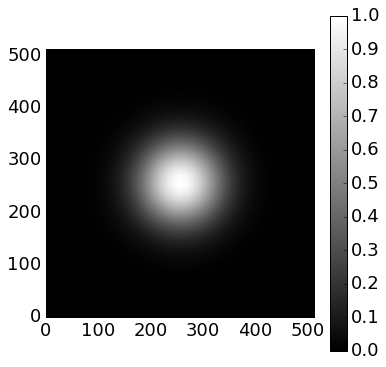

Current iter. : 1700
        Error : 2.47e-03
Current iter. : 1800
        Error : 2.63e-03
Current filter:


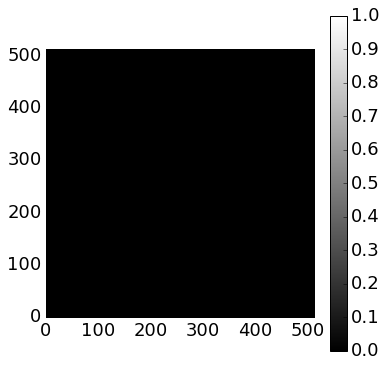

Current iter. : 1900
        Error : 2.09e-05
Current iter. : 2000
        Error : 1.71e-05
-----------------------
First iteration error: 1.06e-02
Final iteration : 2000
Final Error: 1.71e-05


In [38]:
OSS_pup7,OSS_foc7,OSS_errlist7,OSS_pup_proj7 = test.OSS(beta=0.7,init='random')

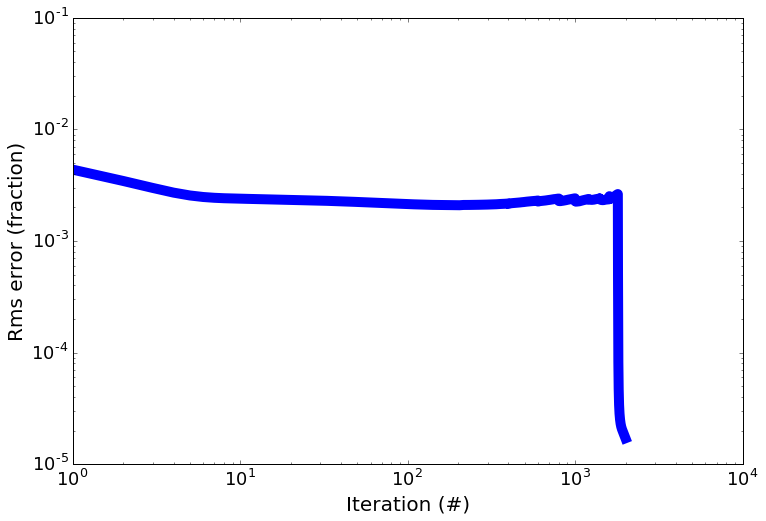

In [39]:
plot_errlist(OSS_errlist7)

Now I think the "cliff" near #1000 iteration is caused by the highly concentrated filter at those final 'steps'. In other words, the error evolution in OSS might not be a good representation of the "error", at least in the Fourier (Rodriguez _et al._ call it the "reciprocal") domain.

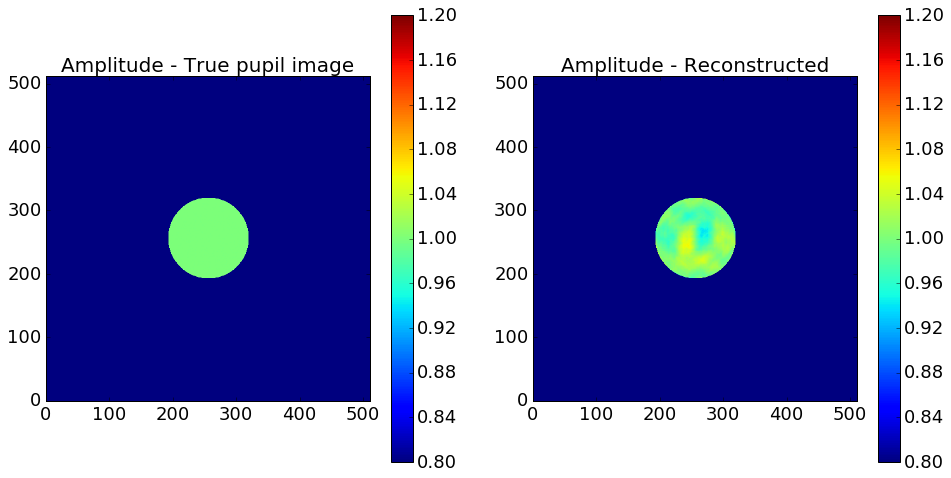

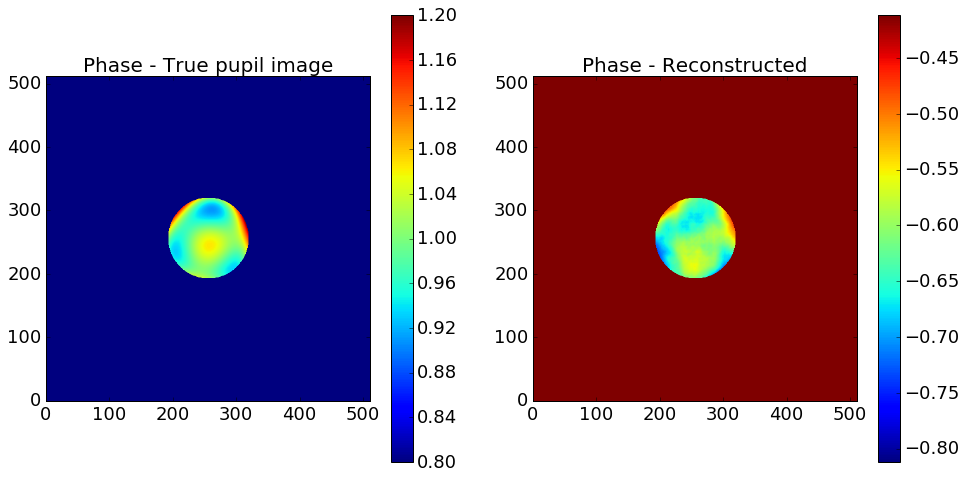

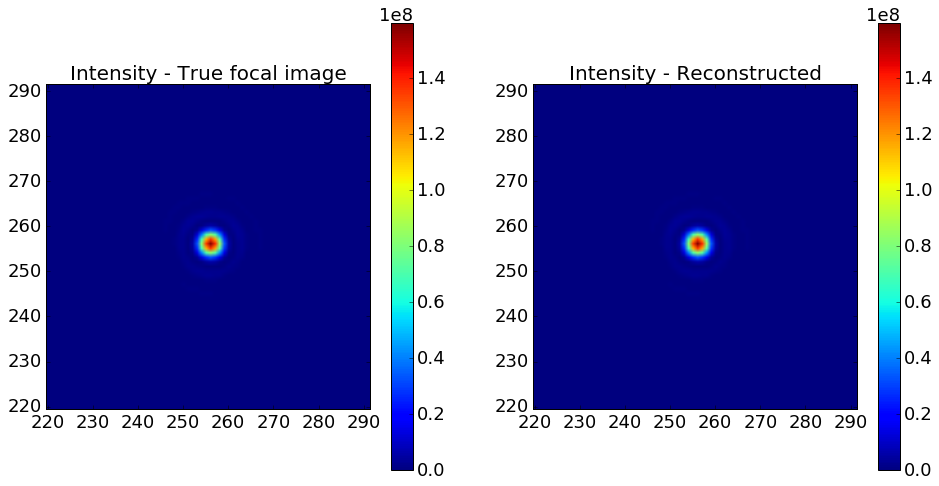

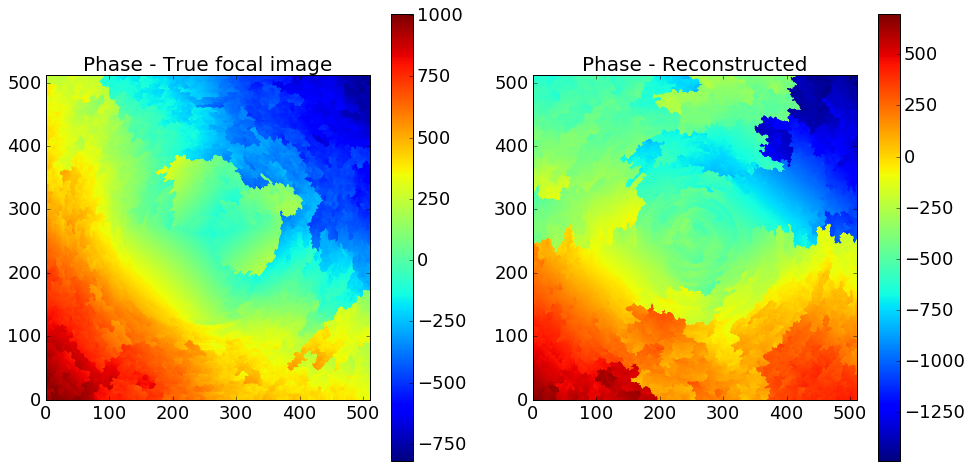

In [40]:
plot_recon(P_,F_,OSS_pup7,OSS_foc7,recons_clim=True)

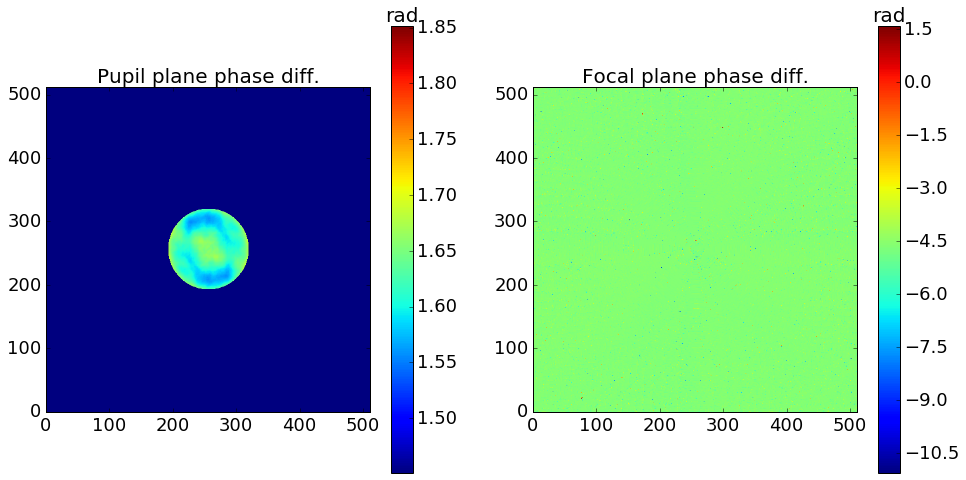

In [41]:
plot_phase_residual(P_,F_,OSS_pup7,OSS_foc7)

Not so different from 0.5 case: Is $\beta$ of 0.7 a better choice? What about 1?

#### 2. $\beta=1$

Caution: Pupil image is not used for constraints.
         This is one-image process.


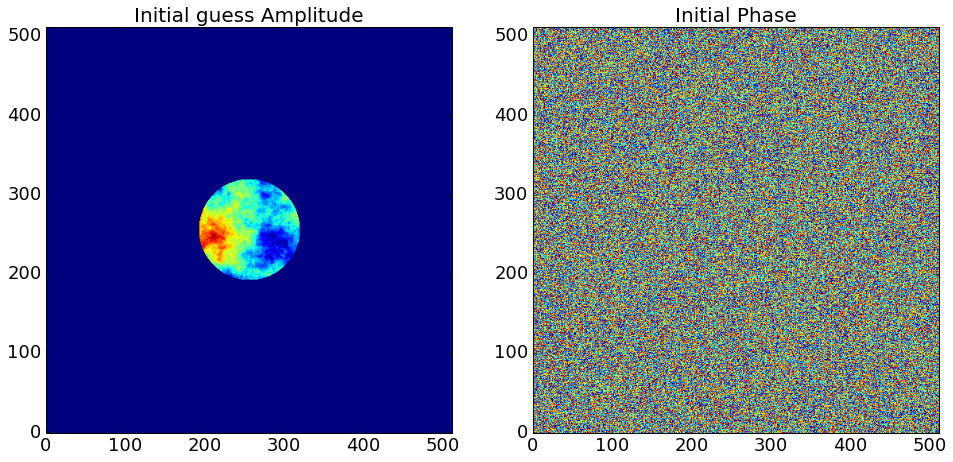

Current filter:


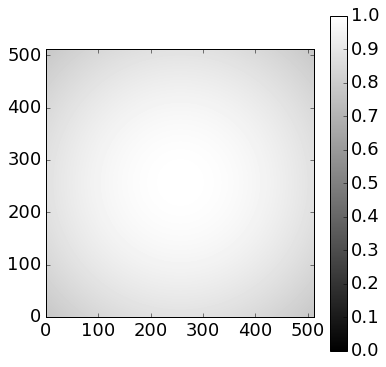

Current iter. : 100
        Error : 3.54e-03
Current iter. : 200
        Error : 3.30e-03
Current filter:


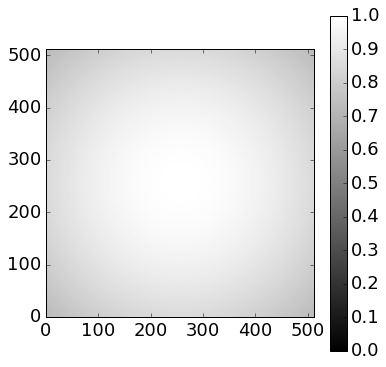

Current iter. : 300
        Error : 3.19e-03
Current iter. : 400
        Error : 3.13e-03
Current filter:


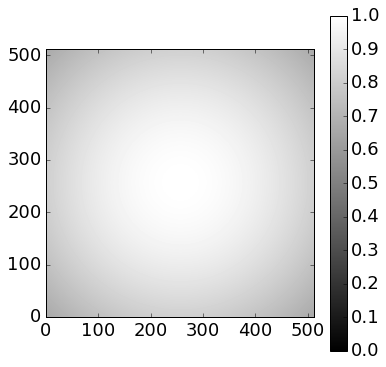

Current iter. : 500
        Error : 3.11e-03
Current iter. : 600
        Error : 3.09e-03
Current filter:


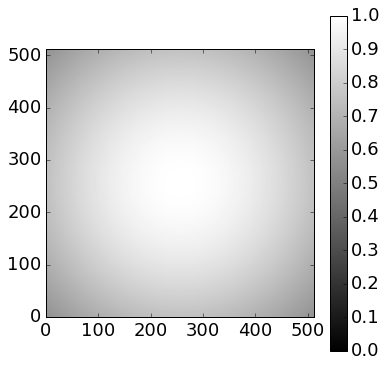

Current iter. : 700
        Error : 3.08e-03
Current iter. : 800
        Error : 3.08e-03
Current filter:


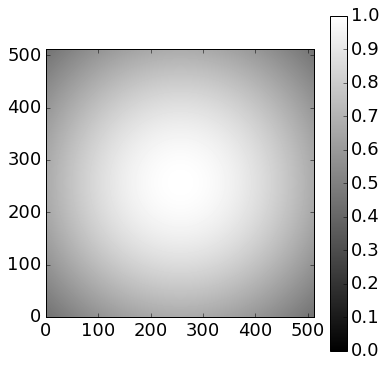

Current iter. : 900
        Error : 3.08e-03
Current iter. : 1000
        Error : 3.08e-03
Current filter:


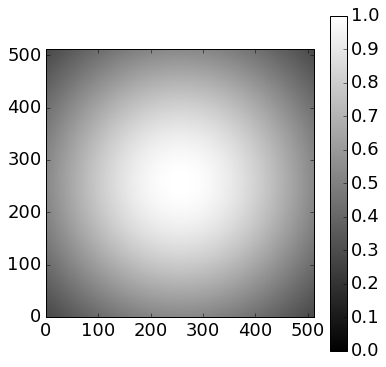

Current iter. : 1100
        Error : 3.05e-03
Current iter. : 1200
        Error : 3.06e-03
Current filter:


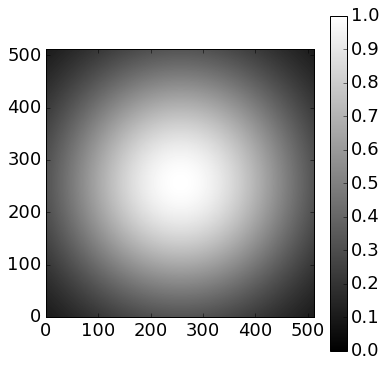

Current iter. : 1300
        Error : 2.97e-03
Current iter. : 1400
        Error : 2.95e-03
Current filter:


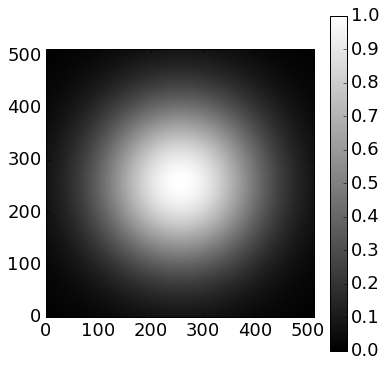

Current iter. : 1500
        Error : 2.79e-03
Current iter. : 1600
        Error : 2.77e-03
Current filter:


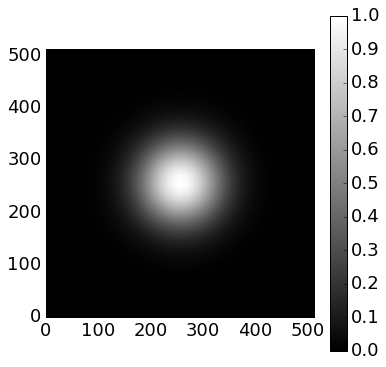

Current iter. : 1700
        Error : 2.61e-03
Current iter. : 1800
        Error : 2.68e-03
Current filter:


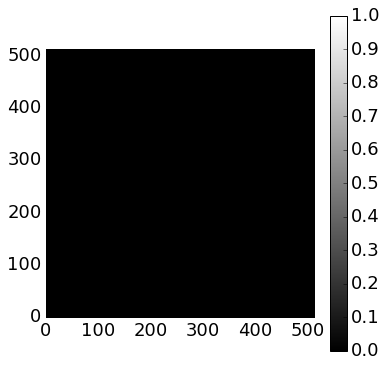

Current iter. : 1900
        Error : 1.88e-05
Current iter. : 2000
        Error : 1.67e-05
-----------------------
First iteration error: 1.04e-02
Final iteration : 2000
Final Error: 1.67e-05


In [42]:
OSS_pup1,OSS_foc1,OSS_errlist1,OSS_pup_proj1 = test.OSS(beta=1.,init='random')

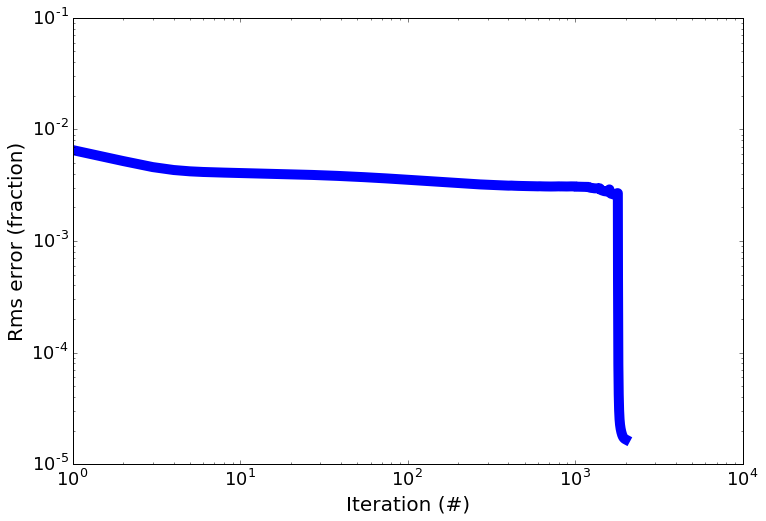

In [43]:
plot_errlist(OSS_errlist1)

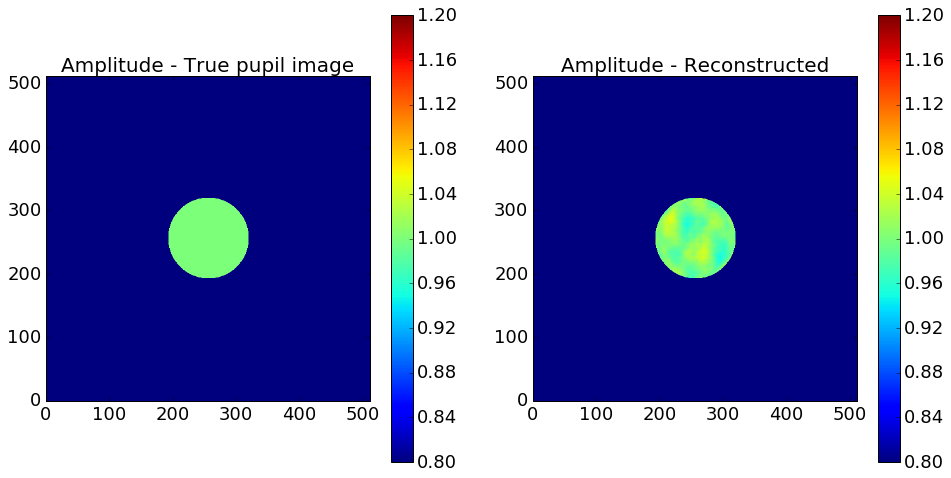

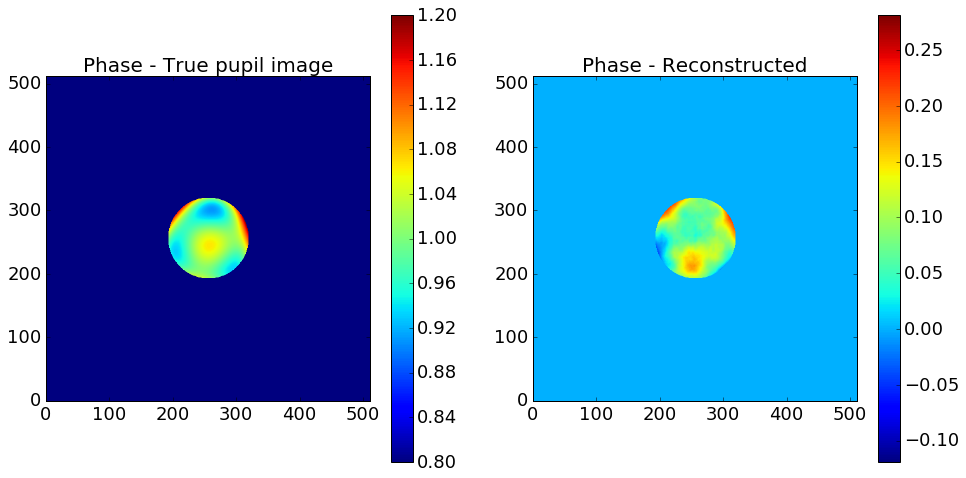

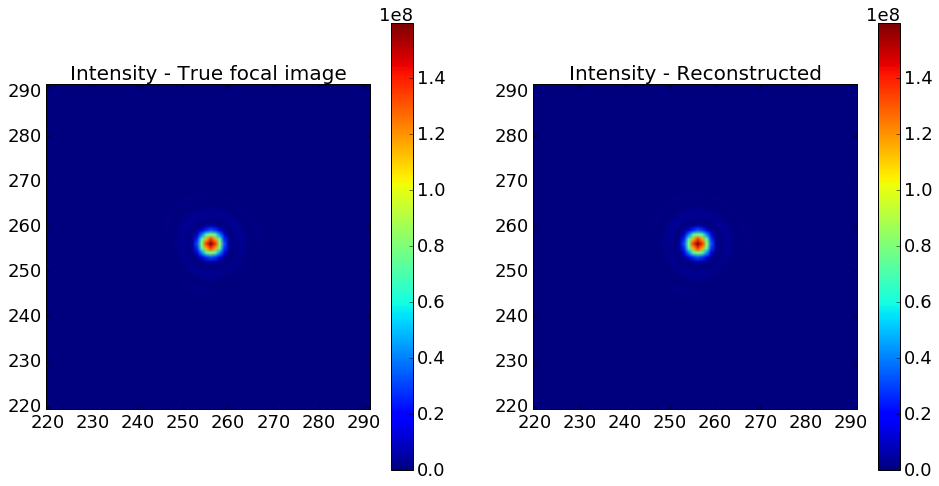

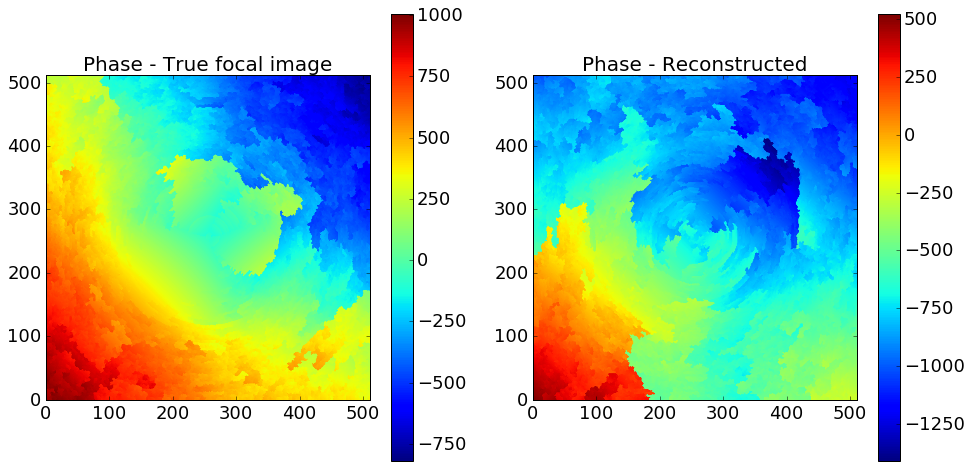

In [44]:
plot_recon(P_,F_,OSS_pup1,OSS_foc1,recons_clim=True)

Looks like smaller $\beta$ would produce better results, opposite to pure HIO. Yet $\alpha$ can be tuned as well so this can be very scenario-dependent.

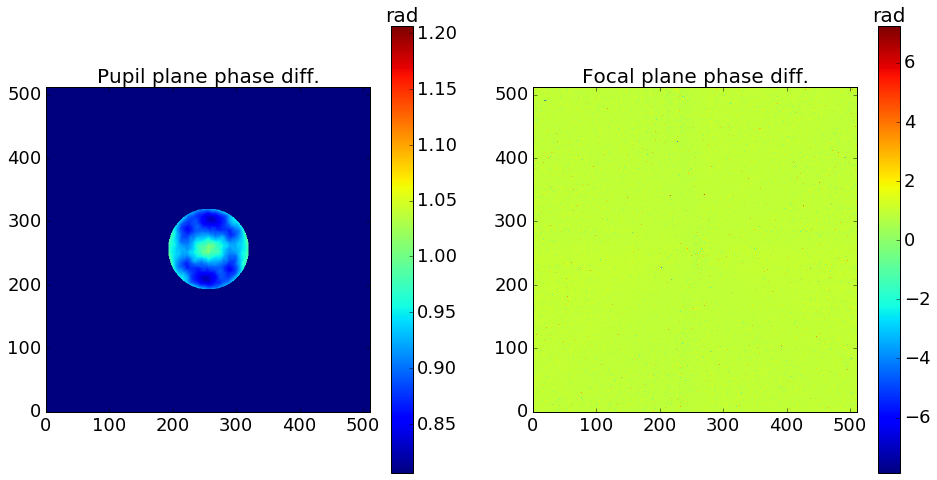

In [45]:
plot_phase_residual(P_,F_,OSS_pup1,OSS_foc1)

Finding the best choices for $\alpha$ and $\beta$ definitely requires much work on simulations. Quote the OSS paper:
> The number of steps and parameter 􏰉 in the algorithm have been chosen heuristically on the basis of numerical simulations and the application of the algorithm to experimental data.

But perhaps before that, we'll have to test it (among other algorithms) in the presence of noise, and for more realistic datasets.